# Heart failure Predictions

First year of the COVID-19 pandemic saw a steep rise in cardiovascular diseases. Cardiovascular diseases (CVDs) are the number 1 cause of death globally. Heart attacks and strokes contribute to the majority of these fatalities, often occurring prematurely in individuals under 70 years of age. Heart failure, a common consequence of CVDs, is the focus of this analysis.

The goal of the project is to develop a machine learning model to predict the possibility of heart disease using a dataset. It encompasses crucial attributes such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiogram results, maximum heart rate achieved, exercise-induced angina, oldpeak, and the slope of the peak exercise ST segment. By leveraging these features, the machine learning model aims to provide early detection and management strategies for individuals at high cardiovascular risk.

The insights derived from this project will contribute to the ongoing efforts in preventive healthcare and early disease management, particularly for individuals with established risk factors such as hypertension, diabetes, hyperlipidemia, or pre-existing cardiovascular conditions. Harnessing the power of machine learning, this project aims to enhance the accuracy and efficiency of heart disease prediction, thereby saving lives and promoting a healthier society.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [4]:
#import data
df= pd.read_csv('heart.csv')

The diagnosis of heat diseases is done on a combination of clinical signs and test results. The types of tests run will be chosen on the bases of what the physicial thinks is going on, ranging from ECG and cardiac CT scans, to blood tests and exercise stress test 2.
Looking at information of heart disease risk factors led me to following: *high cholestrol*, *high blood pressure*, *diabetes, weight, family history, and smoking.*
According to another source, the major factor that can't be changed are: *increasing age, male gender and heredity.* Note that thalassemia, one of the variables in this dataset, is heredity.

In [42]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The dataset is available n Kaggle website, and it is from a ongoing cardiovascular study. The dataset provides patients information regarding their Age, Sex, Chest Pain Type, Rating Blood Pressure, Cholestrol levels, Resting ECG level, Maximum Heart Rating, Exercise Angina, Old Peak , sloping of ST depression,  and if the person has eart diseases or not. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

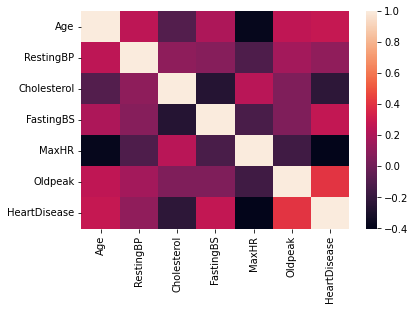

In [9]:
sns.heatmap(df.corr())

We can see that age of a person and heart diseases if correlated. Also Oldpeak and HeartDiseases is highly correlated. From the graph above, we can also see that HeartDiseases and Maximum Heart Rate Achieved (MaxHR) has almost no correlation. MaxHR also has no correlation with Age of a person. This is because there could be many reasons for an increased Heart Rate.

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

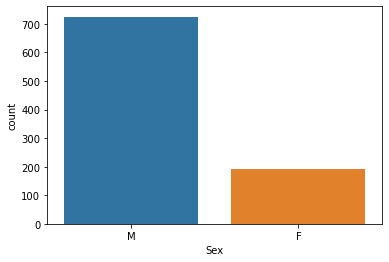

In [10]:
sns.countplot('Sex', data= df)

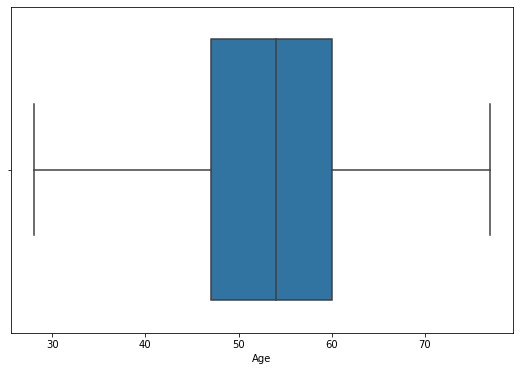

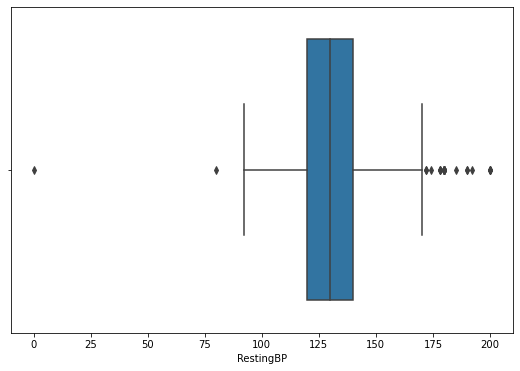

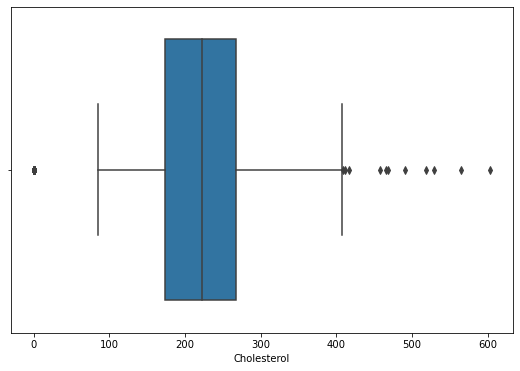

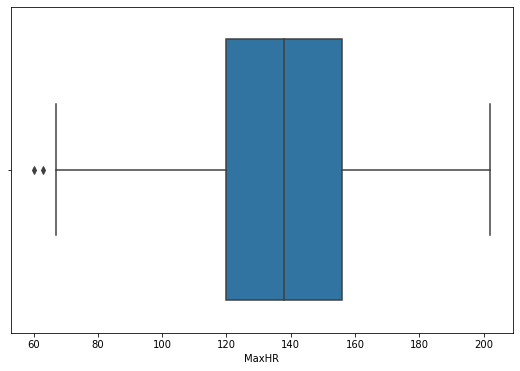

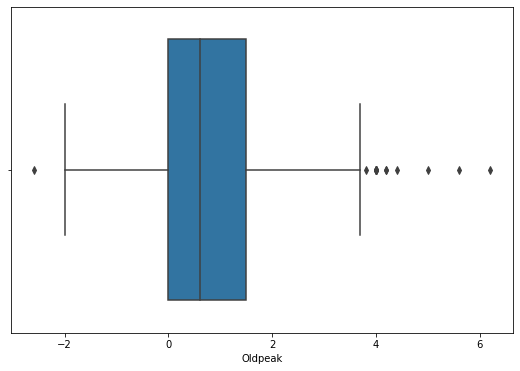

In [39]:
# outlier
col2=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for c in col2:
    fig=plt.figure(figsize=(9,6))
    sns.boxplot(x=df[c],hue=df.HeartDisease)

##### Data Cleaning and Feature Engineering. 

In [13]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [14]:
print('Inital Features:\n', list (df.columns),"\n")

Inital Features:
 ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'] 



In [15]:
df_dumy= pd.get_dummies(df, dtype= float)
print('after dummies \n', list(df_dumy.columns))

after dummies 
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [16]:
df_dumy.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,...,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,...,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

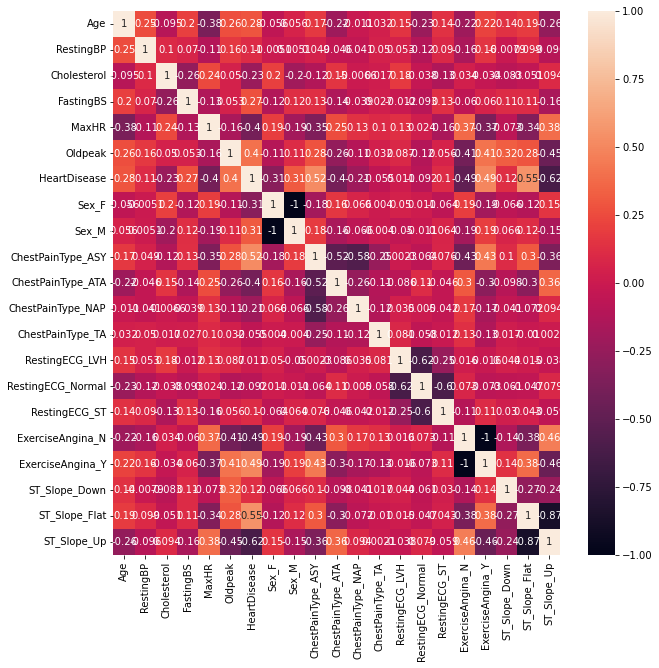

In [43]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_dumy.corr(), annot= True)

In the plot above we can see that Heart Diseases are highly correlated to  Angina the comes with exercise. We can also observe from the graph that ST_Slope flat and Heart disease has a positive correlation. 

## Model Building


As a result of our initial evalation, we have used Machine learnign algorithms to make predictions. We have used. KNN, Gradient Boosting Classifier, Random Forest Classifier, XGBoosting and Decision Tree algorithm.


In [18]:
X= df_dumy.drop(['HeartDisease'], axis = 1)
y= df_dumy['HeartDisease']
X=X.values
y=y.values
print('X::shape={} and datatype={}'.format(X.shape, X.dtype))
print('Y::shape={} and datatype={}'.format(y.shape, y.dtype))

X::shape=(918, 20) and datatype=float64
Y::shape=(918,) and datatype=int64


In [19]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 7)

In [20]:
knn =  KNeighborsClassifier(n_neighbors=10, algorithm= 'auto')

In [21]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### KNN Model

##### Test Accuracy of KNN Model Accuracy is 87%

In [22]:
knn.fit (x_train_scaled, y_train)


knn.score(x_test_scaled, y_test)
# model predictions on test data
pred_knn= knn.predict(x_test_scaled)
#pred_prob
pred_prob_knn= knn.predict_proba(x_test_scaled)[:,1]

# accuracy for a scaled test set
acc_knn= knn.score(x_test_scaled, y_test)
#precision
precision_knn = precision_score(y_test, pred_knn)
#recall
recall_knn= recall_score(y_test, pred_knn)
#f1_score
knn_f1= f1_score(y_test, pred_knn)
#average precsion
ap_knn= average_precision_score(y_test, pred_prob_knn)

#print
print("Model KNN:\n")
print("1. Accuracy: {:.2f}".format(acc_knn))
print("2. Precision: {:.2f}".format(precision_knn))
print("3. Recall: {:.2f}".format(recall_knn))
print("4. f1-measure: {:.2f}".format(knn_f1))
print("5. Average Precision: {:.3f}".format(ap_knn))

Model KNN:

1. Accuracy: 0.87
2. Precision: 0.88
3. Recall: 0.88
4. f1-measure: 0.88
5. Average Precision: 0.880


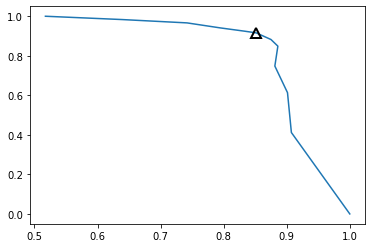

In [23]:

precision_knn, recall_knn, thres_knn = precision_recall_curve(y_test, pred_prob_knn)

# find threshold closest to zero
plt.plot(precision_knn, recall_knn, label='KNN')

close_default_knn= np.argmin(np.abs(thres_knn -0.50))
plt.plot(precision_knn[close_default_knn], recall_knn[close_default_knn], '^',c='k', markersize= 10, label='threshold 0.5 knn', fillstyle= "none", mew=2)


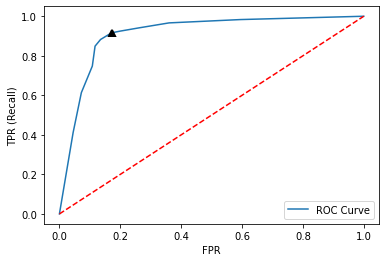

In [24]:
fpr_knn, tpr_knn, thres_knn= roc_curve(y_test, pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_knn= np.argmin(np.abs(thres_knn-0.50))
plt.plot(fpr_knn[close_default_knn], tpr_knn[close_default_knn], '^', c='k', mew=2)

plt.legend(loc= 4)
plt.plot([0, 1], [0, 1],'r--')

In [25]:
roc_auc_knn= roc_auc_score(y_test, pred_prob_knn)
cm_knn= confusion_matrix(y_test, pred_knn)

print("6. ROC AUC: {:.3f}".format(roc_auc_knn))
print("7. Confusion Matrix: \n{}".format(cm_knn))

6. ROC AUC: 0.911
7. Confusion Matrix: 
[[ 96  15]
 [ 14 105]]


### Decision Tree Model

##### Test Accuracy of Decision Tree Accuracy is 82%

In [26]:
tree= DecisionTreeClassifier( random_state= 0)
#Buuilding a decision tree model o scaled training data
tree.fit(x_train_scaled, y_train)
#Accuracy for  scaled test set
tree.score(x_test_scaled, y_test)

#model prediction on test data 
pred_tree= tree.predict(x_test_scaled)

#pred probability
pred_prob_tree= tree.predict_proba(x_test_scaled)[:,1]

# accuracy
acc_tree= tree.score(x_test_scaled, y_test)

#Precision
prec_tree= precision_score(y_test, pred_tree)

#recall
recall_tree= recall_score(y_test, pred_tree)

#f1 score
f1_tree= f1_score(y_test, pred_tree)

#average precision
ap_tree = average_precision_score(y_test, pred_prob_tree)


print("Model DecisionTree:\n")
print("1. Accuracy: {:.2f}".format(acc_tree))
print("2. Precision: {:.2f}".format(prec_tree))
print("3. Recall: {:.2f}".format(recall_tree))
print("4. f1-measure: {:.2f}".format(f1_tree))
print("5. Average Precision: {:.3f}".format(ap_tree))

Model DecisionTree:

1. Accuracy: 0.82
2. Precision: 0.82
3. Recall: 0.83
4. f1-measure: 0.82
5. Average Precision: 0.768


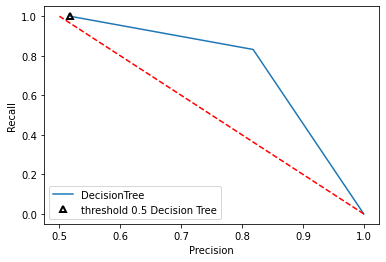

In [27]:

prec_tree, recall_tree, thres_tree= precision_recall_curve(y_test, pred_prob_tree)

plt.plot(prec_tree, recall_tree, label = "DecisionTree")

close_default_tree= np.argmin(np.abs(thres_tree -0.5))
plt.plot(prec_tree[close_default_tree], recall_tree[close_default_tree], '^', c='k', label='threshold 0.5 Decision Tree', fillstyle='none', mew= 2)
plt.plot([1, 0.5], [0, 1],'r--')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


6. ROC AUC: 0.817
7. Confusion matrix:
[[89 22]
 [20 99]]


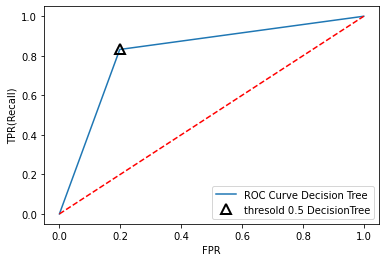

In [28]:
fpr_tree, tpr_tree, thres_tree= roc_curve(y_test, pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, label="ROC Curve Decision Tree")
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")

close_default_tree= np.argmin(np.abs(thres_tree - 0.5))
plt.plot(fpr_tree[close_default_tree], tpr_tree[close_default_tree], '^', c='k', markersize= 10, label= 'thresold 0.5 DecisionTree', fillstyle="none", mew= 2)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)

#roc_auc
roc_auc_tree= roc_auc_score(y_test, pred_tree)
cm_tree= confusion_matrix(y_test, pred_tree)

print("6. ROC AUC: {:.3f}".format(roc_auc_tree))
print("7. Confusion matrix:\n{}".format(cm_tree))

### RandomForest model

##### Test Accuracy of RandomForest  is 83%

In [29]:
rf = RandomForestClassifier(n_estimators=10, random_state=5)

rf.fit(x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)


#accuracy
acc_rf= rf.score(x_test_scaled, y_test)

#prediction
pred_rf= rf.predict(x_test_scaled)

#precision
prec_rf= precision_score(y_test, pred_rf)

#Recall
recall_rf= recall_score(y_test, pred_rf)

#f1_score
f1_rf = f1_score(y_test, pred_rf)



# print
print("Model RandomForest:\n")
print("1. Accuracy: {:.2f}".format(acc_rf))
print("2. Precision: {:.2f}".format(prec_rf))
print("3. Recall: {:.2f}".format(recall_rf))
print("4. F1 Score: {:.2f}".format(f1_rf))


Model RandomForest:

1. Accuracy: 0.83
2. Precision: 0.83
3. Recall: 0.85
4. F1 Score: 0.84


5. Average Precision: 0.862


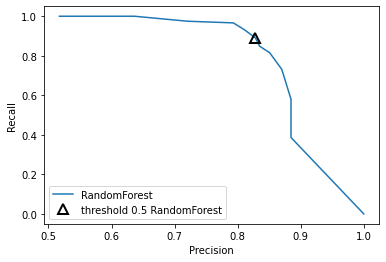

In [30]:
pred_prob_rf = rf.predict_proba(x_test_scaled)[:,1]

#average precision
ap_rf = average_precision_score(y_test, pred_prob_rf)
print("5. Average Precision: {:.3f}".format(ap_rf))


prec_rf, recall_rf, thres_rf= precision_recall_curve(y_test, pred_prob_rf)

#find threshold closest to zero
plt.plot(prec_rf, recall_rf, label='RandomForest')
closest_default_rf= np.argmin(np.abs(thres_rf-0.5))

#
plt.plot(prec_rf[closest_default_rf], recall_rf[closest_default_rf], '^', label='threshold 0.5 RandomForest', markersize= 10, c='k', fillstyle="none", mew= 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


6. ROC AUC: 0.903
7. Confusion matrix:
[[ 91  20]
 [ 18 101]]


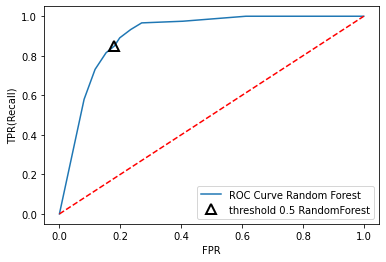

In [31]:
fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, pred_prob_rf)
plt.plot(fpr_rf,tpr_rf, label= "ROC Curve Random Forest")
plt.xlabel('FPR')
plt.ylabel('TPR(Recall)')

close_default_rf= np.argmin(np.abs(thres_rf - 0.50))

plt.plot(fpr_rf[closest_default_rf], tpr_rf[closest_default_rf], '^', 
         label='threshold 0.5 RandomForest', markersize= 10, c='k', 
         fillstyle="none", mew= 2)

plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')

roc_auc_rf = roc_auc_score(y_test, pred_prob_rf)
print("6. ROC AUC: {:.3f}".format(roc_auc_rf))

confusion = confusion_matrix(y_test, pred_rf)
print("7. Confusion matrix:\n{}".format(confusion))



### GradientBoosting model

In [32]:
gbrt= GradientBoostingClassifier(random_state = 10 )
gbrt.fit(x_train_scaled, y_train)

#accuracy
gbrt.score(x_test_scaled, y_test)
acc_gbrt= gbrt.score(x_test_scaled, y_test)

#Prediction
pred_gbrt= gbrt.predict(x_test_scaled)

#Precision
prec_gbrt = precision_score(y_test, pred_gbrt)

#Recall
recall_gbrt= recall_score(y_test, pred_gbrt)

#F1 score
f1_gbrt= f1_score(y_test, pred_gbrt)

#print
print("Model GradientBoosting: \n")
print("1. Accuracy: {}".format(acc_gbrt))
print("2. Precision: {}".format(prec_gbrt))
print("3. Recall: {}".format(recall_gbrt))
print("4 F1- measure: {}".format(f1_gbrt))

Model GradientBoosting: 

1. Accuracy: 0.8739130434782608
2. Precision: 0.8571428571428571
3. Recall: 0.907563025210084
4 F1- measure: 0.8816326530612244


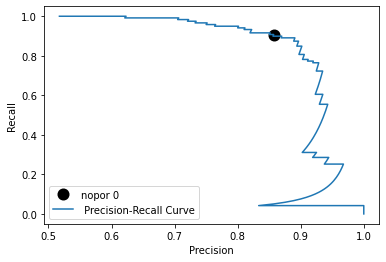

In [33]:
decision_function_gbrt = gbrt.decision_function(x_test_scaled)
prec_gbrt, recall_gbrt, thres_gbrt = precision_recall_curve(y_test, decision_function_gbrt)

#find threshold closest yo zero
close_zero = np.argmin(np.abs(thres_gbrt))
plt.plot(prec_gbrt[close_zero], recall_gbrt[close_zero], 'o', markersize =10, label='nopor 0',
        c='k', mew=2)
plt.plot(prec_gbrt, recall_gbrt, label=' Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

6. ROC AUC: 0.931
7. Confusion matrix:
[[ 93  18]
 [ 11 108]]
8. Classification Report:
                    precision    recall  f1-score   support

Not HeartFailure       0.89      0.84      0.87       111
    HeartFailure       0.86      0.91      0.88       119

        accuracy                           0.87       230
       macro avg       0.88      0.87      0.87       230
    weighted avg       0.88      0.87      0.87       230



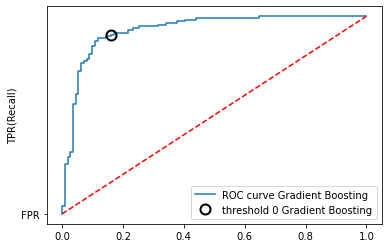

In [34]:
fpr_gbrt, tpr_gbrt, thres_gbrt= roc_curve(y_test, decision_function_gbrt)
plt.plot(fpr_gbrt, tpr_gbrt, label= 'ROC curve Gradient Boosting')
plt.plot("FPR")
plt.ylabel("TPR(Recall)")
close_zero= np.argmin(np.abs(thres_gbrt))
plt.plot(fpr_gbrt[close_zero],  tpr_gbrt[close_zero], 'o', markersize= 10, label= "threshold 0 Gradient Boosting", fillstyle= 'none', c='k', mew= 2 )
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')

roc_auc_gbrt = roc_auc_score(y_test, decision_function_gbrt)
print("6. ROC AUC: {:.3f}".format(roc_auc_gbrt))

confusion = confusion_matrix(y_test, pred_gbrt)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_gbrt, target_names=["Not HeartFailure", "HeartFailure"]))

   ### XGB model

In [35]:
xgbr = xgb.XGBClassifier(randomn_state=48)

xgbr.fit(x_train_scaled, y_train)

#Predictions
pred_xgbr= xgbr.predict(x_test_scaled)

# prediction Probability


#Accuracy for a scaled test set
xgbr.score(x_test_scaled, y_test)
acc_xgbr= xgbr.score(x_test_scaled, y_test)

#precision 
prec_xgbr= precision_score(y_test, pred_xgbr)

#recall
recall_xgbr= recall_score(y_test, pred_xgbr)

#f1- score 
f1_xgbr= f1_score(y_test, pred_xgbr)

#print
print("Model XGB :\n")
print("1. Accuracy: {:.2f}".format(acc_xgbr))
print("2. Precision: {:.2f}".format(prec_xgbr))
print("3. Recall: {:.2f}".format(recall_xgbr))
print("4. f1 measure:{:.2f}".format(f1_xgbr))

[16:15:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "randomn_state" } are not used.

Model XGB :

1. Accuracy: 0.87
2. Precision: 0.86
3. Recall: 0.90
4. f1 measure:0.88


5. Average Precision: 0.903


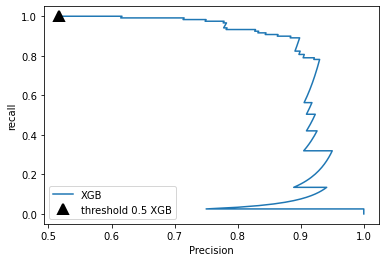

In [36]:
pred_prod_xgbr= xgbr.predict_proba(x_test_scaled)[:,1]
prec_xgbr, recall_xgbr, thres_xgbr= precision_recall_curve(y_test, pred_prod_xgbr)

#find threshold closest to zero
plt.plot(prec_xgbr, recall_xgbr, label= "XGB")
close_default_xgbr= np.argmin(np.abs(thres_xgbr))

plt.plot(prec_xgbr[close_default_xgbr], recall_xgbr[close_default_xgbr], '^', c='k', markersize= 10, label="threshold 0.5 XGB", mew= 2)
plt.xlabel("Precision")
plt.ylabel("recall")
plt.legend(loc="best")

ag_xgbr= average_precision_score(y_test, pred_prod_xgbr)
print("5. Average Precision: {:.3f}".format(ag_xgbr))


6. ROC AUC: 0.929
7. Confusion matrix:
[[ 94  17]
 [ 12 107]]
8. Classification Report:
                    precision    recall  f1-score   support

Not HeartFailure       0.89      0.85      0.87       111
    HeartFailure       0.86      0.90      0.88       119

        accuracy                           0.87       230
       macro avg       0.87      0.87      0.87       230
    weighted avg       0.87      0.87      0.87       230



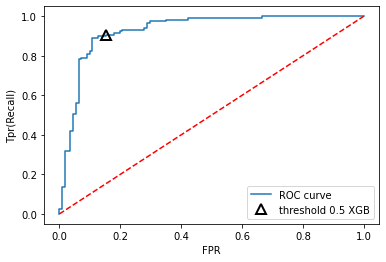

In [37]:
fpr_xgbr, tpr_xgbr, thres_xgbr= roc_curve(y_test, pred_prod_xgbr)
plt.plot(fpr_xgbr, tpr_xgbr, label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("Tpr(Recall)")

#deflaut
close_default_xgbr= np.argmin(np.abs(thres_xgbr - 0.5))

plt.plot(fpr_xgbr[close_default_xgbr], tpr_xgbr[close_default_xgbr], '^', c='k', markersize= 10, 
         label= "threshold 0.5 XGB", fillstyle= 'none', mew=2)
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')

#ROC
roc_auc_xgbr = roc_auc_score(y_test, pred_prod_xgbr)
print("6. ROC AUC: {:.3f}".format(roc_auc_xgbr))

confusion = confusion_matrix(y_test, pred_xgbr)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", 
      classification_report(y_test, pred_xgbr, 
    target_names=["Not HeartFailure", "HeartFailure"]))

### Model Evaluation

In [38]:
models_ROC_AUC= pd.DataFrame({'Model':['KNeignhbour', 'DescisionTree','RandomForest','GradientBoosting', 'XGB'],
                          'ROC_AUC':[roc_auc_knn, roc_auc_tree, roc_auc_rf, roc_auc_gbrt, roc_auc_xgbr]})
models_ROC_AUC.sort_values(by="ROC_AUC", ascending= False)

,Model,ROC_AUC
3,GradientBoosting,0.931335
4,XGB,0.928761
0,KNeignhbour,0.911386
2,RandomForest,0.903361
1,DescisionTree,0.816867
